In [14]:
import PIL
from PIL import Image
import numpy as np
import glob
import skimage.measure

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [12]:
ims = glob.glob("../braincoder/eval/eeg/*3*")

In [22]:
participants = ["kdh", "cmj", "jsm", "kjh", "jyh", "kian", "csw", "kho", "jjw"]

data = {}
for participant in participants:
    targeted = filter(lambda x: participant in x, ims)
    targeted = sorted(targeted, key=lambda x: int(x.split("_")[-1].split(".")[0]))

    data[participant] = [Image.open(t).resize((160, 120)) for t in targeted]

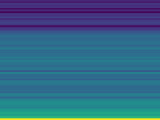

In [21]:
data["cmj"][0].resize((160, 120))

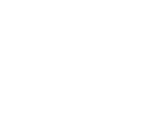

In [36]:
im = Image.new(mode="RGB", size=(160, 120), color=(255, 255, 255))
im

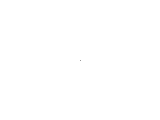

In [37]:
im.putpixel((80, 60),(155, 155, 155))
im

In [34]:
type(im)

NoneType

In [82]:
# base = cmj
temp = []
base = np.array(data["cmj"][0].convert("RGB"))
for i in range(14):
    temp.append(np.array(data["cmj"][i].convert("RGB"))[:, 0])
a = np.stack(temp)
a.shape, a[0]

((14, 120, 3),
 array([[ 71,  39, 119],
        [ 71,  31, 112],
        [ 71,  26, 106],
        [ 69,  54, 128],
        [ 68,  53, 128],
        [ 70,  44, 124],
        [ 69,  49, 126],
        [ 70,  50, 126],
        [ 69,  12,  94],
        [ 70,  27, 108],
        [ 71,  41, 121],
        [ 70,  16,  98],
        [ 68,   5,  87],
        [ 69,  48, 124],
        [ 69,  54, 129],
        [ 70,  49, 125],
        [ 68,  56, 130],
        [ 65,  66, 135],
        [ 69,  44, 121],
        [ 69,  44, 121],
        [ 67,  59, 131],
        [ 67,  60, 131],
        [ 65,  66, 134],
        [ 66,  62, 133],
        [ 67,  56, 129],
        [ 71,  23, 104],
        [ 70,  14,  97],
        [ 70,  43, 122],
        [ 68,  56, 130],
        [ 68,  57, 130],
        [ 63,  71, 135],
        [ 57,  85, 139],
        [ 56,  87, 139],
        [ 52,  95, 141],
        [ 49, 100, 141],
        [ 47, 107, 142],
        [ 45, 110, 142],
        [ 46, 106, 141],
        [ 48, 103, 141],
        [ 

In [100]:
width = 160
height = 120

results = []
for par in ["kdh", "jsm", "kjh", "jyh", "kian", "csw", "kho", "jjw"]:
    im = Image.new(mode="RGB", size=(14, 120), color=(255, 255, 255))
    for channel in range(14):
        to_compare = np.array(data[par][channel].convert("RGB"))[:, 0]
        diff = to_compare-a[channel]
        for j in range(height):
            # value = (int((diff[j, 0]+diff[j, 1]+diff[j, 2])/3), 255, 255)
            value = (diff[j, 0], diff[j, 1], diff[j, 2])
            im.putpixel((channel, j), value)
    results.append(im)

In [106]:
results[5]

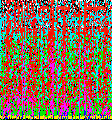

In [113]:
def concat(ims):
    w, h = ims[0].size
    dst = Image.new("RGB", (w*len(ims), h))
    for index in range(len(ims)):
        dst.paste(ims[index], (index*w, 0))

    return dst

concat(results)

In [4]:
import glob
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import matplotlib.pyplot as plt

files = glob.glob("./gradual_animation/*")
files = sorted(files, key=lambda x: int(x.split("_")[-2]))

imgs = [Image.open(file) for file in files]

myFont = ImageFont.truetype('MaruBuri-Bold.ttf', 35)

for i, im in enumerate(imgs):
    I1 = ImageDraw.Draw(im)
    # Add Text to an image
    I1.text((28, 36), f"Epoch: {i+1}", font=myFont, fill=(0, 0, 0))
    imgs[i] = im

In [11]:
result = Image.open("./gt.jpeg")
I1 = ImageDraw.Draw(result)
I1.text((28, 36), f"Ground Truth", font=myFont, fill=(0, 0, 0))
imgs.append(result)

In [2]:
len(imgs)

39

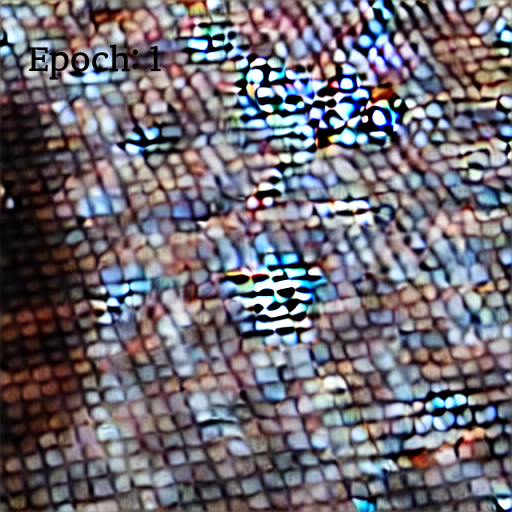

In [3]:
imgs[0]

/var/folders/pk/4stgl7rx1rd40xnz4plktxy00000gn/T/ipykernel_5700/2024505789.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


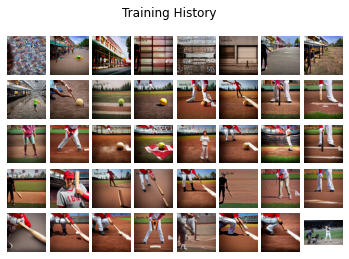

In [17]:
# fig = plt.figure(figsize=(300, 400))
fig = plt.figure()
gs = fig.add_gridspec(5, 8, hspace=0.1,wspace=0.1)
# main = fig.add_subplot()
for row in range(5):
    for column in range(8):
        ax = fig.add_subplot(gs[row, column])
        ax.imshow(imgs[8*row+column])
        ax.axis("off")

fig.suptitle("Training History")
fig.tight_layout()
fig.savefig("output.png", dpi=500)